In [89]:
using Pkg
Pkg.activate(".")

  Activating project at `c:\Users\fefif\Desktop\PhD\Progetti\MatrixProductBP.jl`


In [90]:
using HypergeometricFunctions: _₂F₁
using Plots

In [91]:
K = 100
smax = 5
β = 1
;

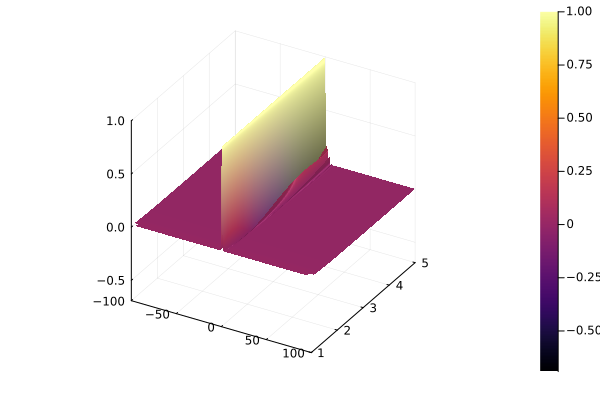

In [92]:
# ℜ(b) = 0
# X = +1

bre = 0.0
γ = -K:K
s = 1:0.1:smax
k(γ) = π .* γ
b(γ,s) = bre + k(γ) / (2*β * s) * im
z(s) = -exp(2β*(1.0+s))
f(γ,s) = real(_₂F₁(1.0,b(γ,s),1+b(γ,s),z(s)))

plot(γ,s,f, st=:surface)

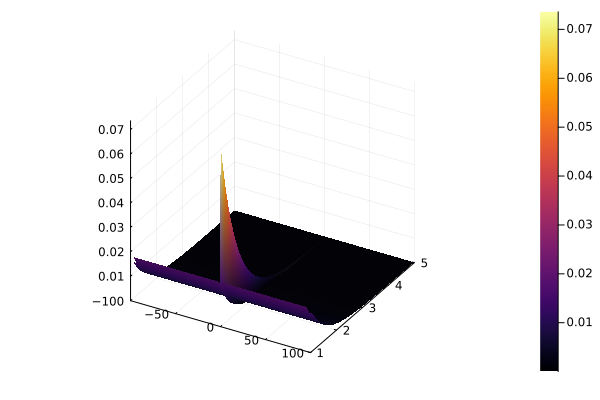

In [93]:
# ℜ(b) = 1
# X = +1

bre = 1.0
γ = -K:K
s = 1:0.1:smax
k(γ) = π .* γ
b(γ,s) = bre + k(γ) / (2*β * s) * im
z(s) = -exp(2β*(1.0+s))
f(γ,s) = real(_₂F₁(1.0,b(γ,s),1+b(γ,s),z(s)))

plot(γ,s,f, st=:surface)

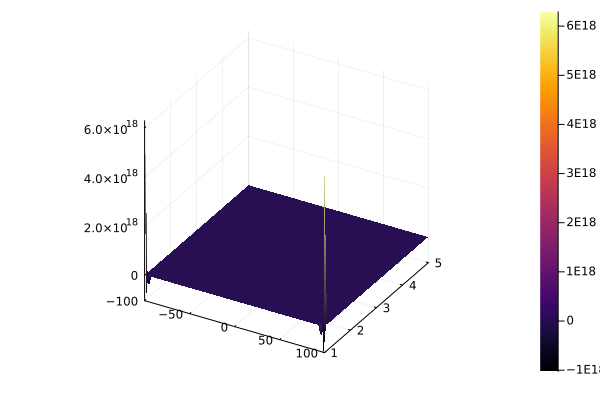

In [94]:
# ℜ(b) = 0
# X = -1

bre = 0.0
γ = -K:K
s = 1:0.1:smax
k(γ) = π .* γ
b(γ,s) = bre + k(γ) / (2*β * s) * im
z(s) = -exp(2β*(1.0-s))
f(γ,s) = real(_₂F₁(1.0,b(γ,s),1+b(γ,s),z(s)))

plot(γ,s,f, st=:surface)

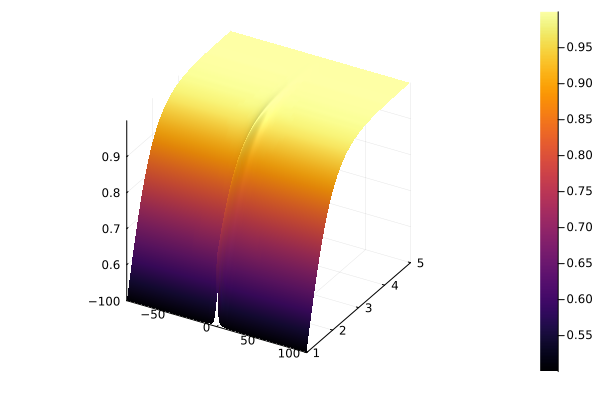

In [95]:
# ℜ(b) = 1
# X = -1

bre = 1.0
γ = -K:K
s = 1:0.1:smax
k(γ) = π .* γ
b(γ,s) = bre + k(γ) / (2*β * s) * im
z(s) = -exp(2β*(1.0-s))
f(γ,s) = real(_₂F₁(1.0,b(γ,s),1+b(γ,s),z(s)))

plot(γ,s,f, st=:surface)